<h1> Task 4

<h2> Exploratory Data Analysis for - Terrorism Dataset

<h2> Performing exploratory Analysis for Terrorism

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"D:\Sparks_Foundation\Task_4\globalterrorismdb_0718dist.csv", encoding='latin1')
df.head()

C:\Users\Abishek Bhat R\AppData\Local\Temp\ipykernel_13000\1785284034.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Sparks_Foundation\Task_4\globalterrorismdb_0718dist.csv", encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.shape

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [8]:
df=df[['iyear','imonth','iday','country_txt','region_txt','provstate','city',
      'latitude','longitude','location','summary','attacktype1_txt','targtype1_txt',
      'gname','motive','weaptype1_txt','nkill','nwound','addnotes']]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Countery','region_txt':'Region','provstate':'Provice/State','city':'City',
      'latitude':'Latitude','longitude':'Longitude','location':'Location','summary':'Summary','attacktype1_txt':'Attack Type','targtype1_txt':'Target Type',
      'gname':'Group Name','motive':'Motive','weaptype1_txt':'Weapon Type','nkill':'killed','nwound':'Wounded','addnotes':'Add Notes'},inplace=True)

In [11]:
df.head()

,Year,Month,Day,Countery,Region,Provice/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [12]:
df.tail()

,Year,Month,Day,Countery,Region,Provice/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,killed,Wounded,Add Notes
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,NaN,12/31/2017: An explosive device was discovered...,Bombing/Explosion,Unknown,Unknown,NaN,Explosives,0.0,0.0,NaN


In [13]:
df.describe()

,Year,Month,Day,Latitude,Longitude,killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Countery       181691 non-null  object 
 4   Region         181691 non-null  object 
 5   Provice/State  181270 non-null  object 
 6   City           181257 non-null  object 
 7   Latitude       177135 non-null  float64
 8   Longitude      177134 non-null  float64
 9   Location       55495 non-null   object 
 10  Summary        115562 non-null  object 
 11  Attack Type    181691 non-null  object 
 12  Target Type    181691 non-null  object 
 13  Group Name     181691 non-null  object 
 14  Motive         50561 non-null   object 
 15  Weapon Type    181691 non-null  object 
 16  killed         171378 non-null  float64
 17  Wounded        165380 non-nul

In [15]:
df.shape

(181691, 19)

In [16]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Countery              0
Region                0
Provice/State       421
City                434
Latitude           4556
Longitude          4557
Location         126196
Summary           66129
Attack Type           0
Target Type           0
Group Name            0
Motive           131130
Weapon Type           0
killed            10313
Wounded           16311
Add Notes        153402
dtype: int64

In [17]:
df['killed']=df['killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)
df['Casualty']=df['killed']+df['Wounded']

In [19]:
# top 50 worst Terrorist attacks
df1 = df.sort_values(by='Casualty',ascending=False)[:50]

In [21]:
heat=df.pivot_table(index='Countery',columns='Year',values='Casualty')
heat.fillna(0,inplace=True)

In [22]:
heat.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Countery,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


In [23]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7'], [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attack in History From 1982 to 2017',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)


In [24]:
df.describe()

,Year,Month,Day,Latitude,Longitude,killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


<h1> Observation

<h2> 1. The data includes terrorist incidents from 1970 to 2017.

<h2>2- Maximum number of fatalities at an incident: 1570

<h2>3- The most injuries sustained in one event was 8191.

<h2>4-9574 is the maximum number of fatalities during an event.

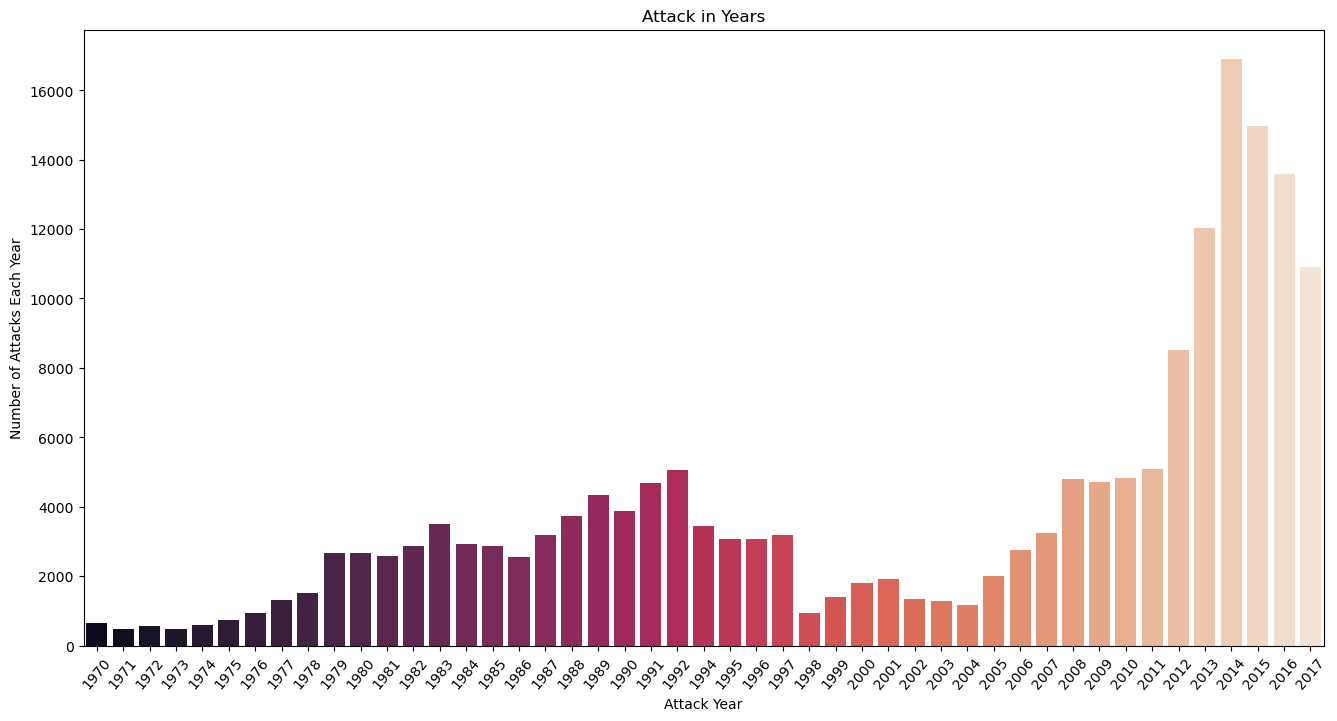

In [25]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,8))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack in Years')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



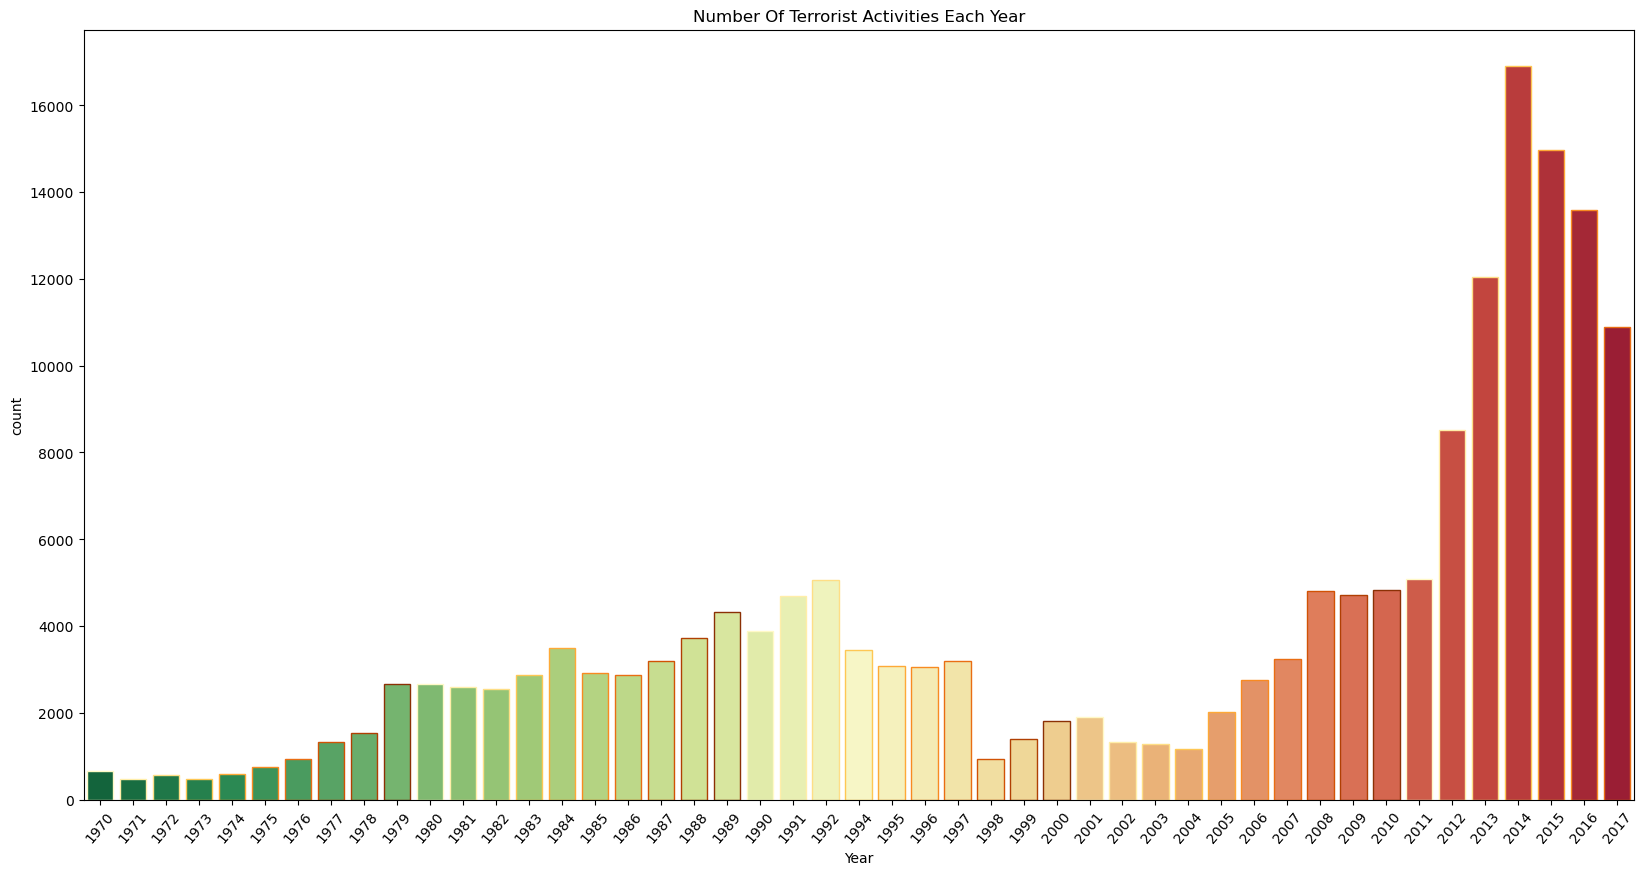

In [26]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('YlOrBr',10))
plt.xticks(rotation=50)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

<h2> yearly terrorist activities by region

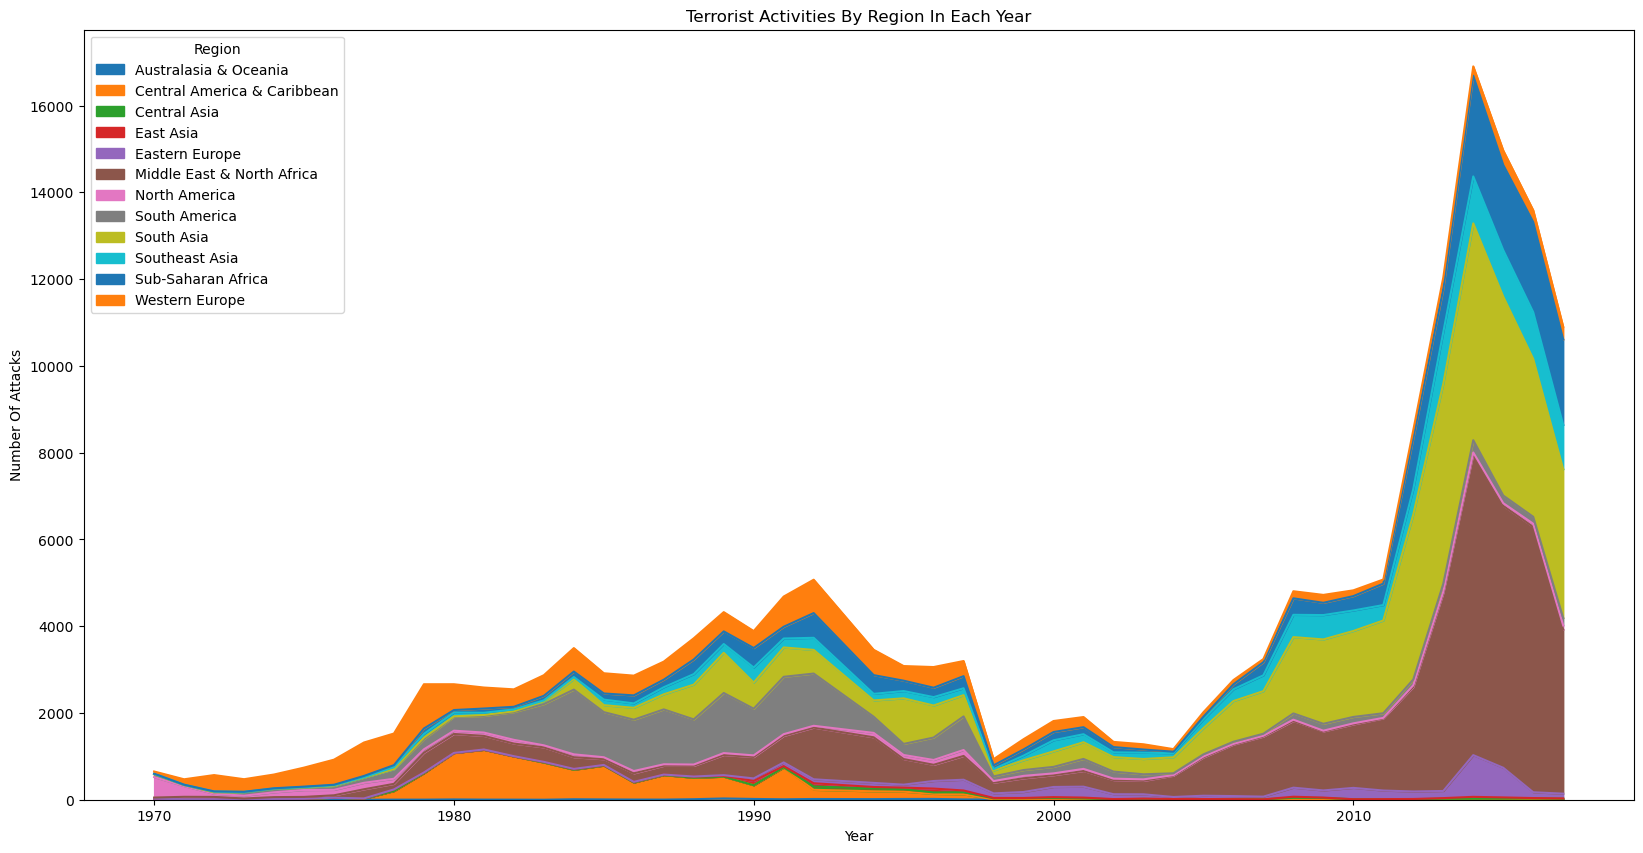

In [27]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number Of Attacks')
plt.show()

In [28]:
df.Countery.value_counts()[:21]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Lebanon            2478
Name: Countery, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



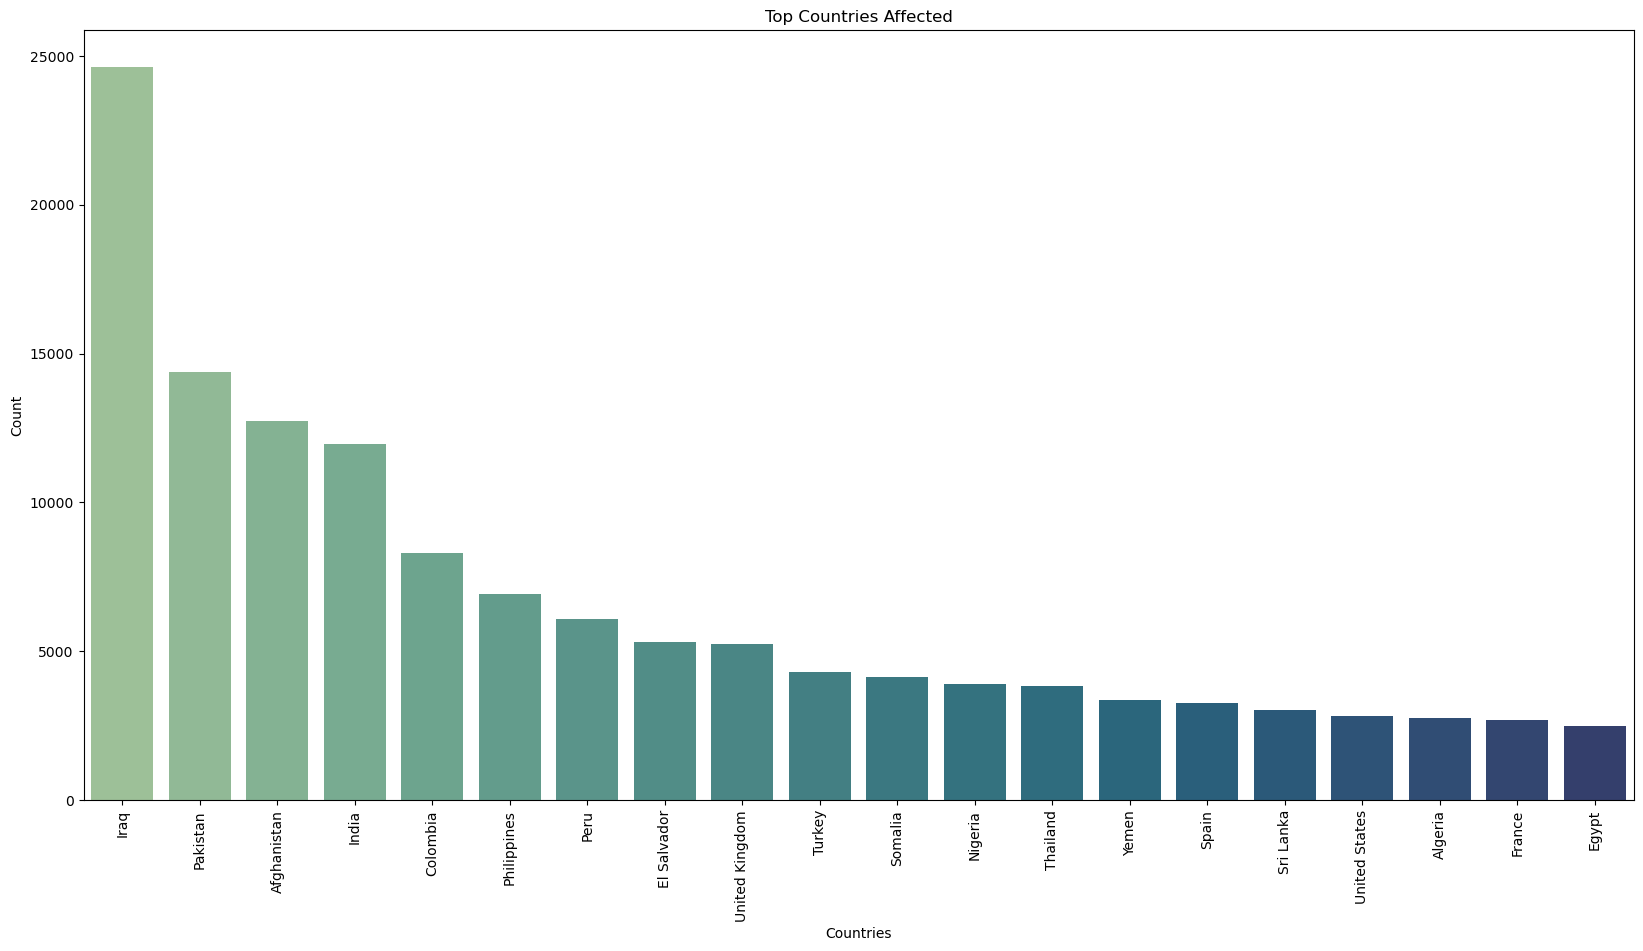

In [29]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Countery'].value_counts()[:20].index,df['Countery'].value_counts()[:20].values,palette="crest")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

<h2> Analyses of Individualized Data

<h2>Terrorist Attacks of a Particular Year And yhier Locations

<h2>Let's take a look at the global terrorist attacks over a specific time period.

In [31]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
MarkerCluster()

In [33]:
filterYear = df['Year'] == 2001

In [34]:
filterData = df[filterYear] # filter Data
#filterdata.info()
reqFilterData = filterData.loc[:,'City':'Longitude'] # get the required fields
reqFilterData = reqFilterData.dropna() # Drop NaN values in lat , long
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [35]:
map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                 popup = reqFilterDataList[point][0]).add_to(markerCluster)


In [37]:
map